In [1]:
from __future__ import division
import glob
import re
import os,sys
from astropy.io import fits
from astropy.convolution import Gaussian1DKernel as GK, convolve as cv
import numpy as np
import matplotlib.pyplot as plt
import astroscrappy
import numpy.ma as ma

In [2]:
# Create a list of all of the fits file directories
obj_list = glob.glob('Spectroscopy_Exercise_files/*.fits')

In [3]:
Arcs = fits.open(obj_list[0])[0].data
ST = fits.open(obj_list[1])[0].data
SS = fits.open(obj_list[2])[0].data

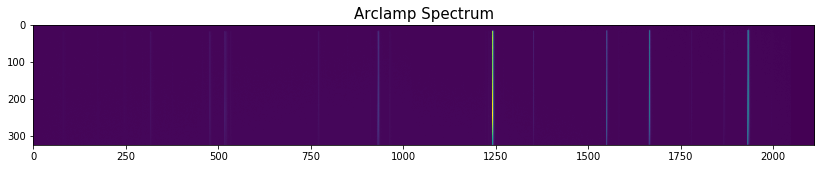

In [4]:
plt.figure(figsize=(14,14))
plt.imshow(Arcs)
plt.title('Arclamp Spectrum',{'fontsize':'15'});

In [5]:
ArcsArr = np.zeros(Arcs.shape[1])
for i in range(Arcs.shape[1]):
    ArcsArr[i] = np.median(Arcs[:,i])
ArcsArr

array([1762., 1781., 1783., ...,  957.,  957.,  945.])

i=475, ArcsArr[i]=5386.0
i=477, ArcsArr[i]=4219.0
i=518, ArcsArr[i]=6615.0
i=770, ArcsArr[i]=5326.0
i=932, ArcsArr[i]=19909.0
i=1241, ArcsArr[i]=52484.0
i=1351, ArcsArr[i]=4813.0
i=1549, ArcsArr[i]=18210.0
i=1664, ArcsArr[i]=37897.0
i=1865, ArcsArr[i]=5215.0
i=1930, ArcsArr[i]=52617.0


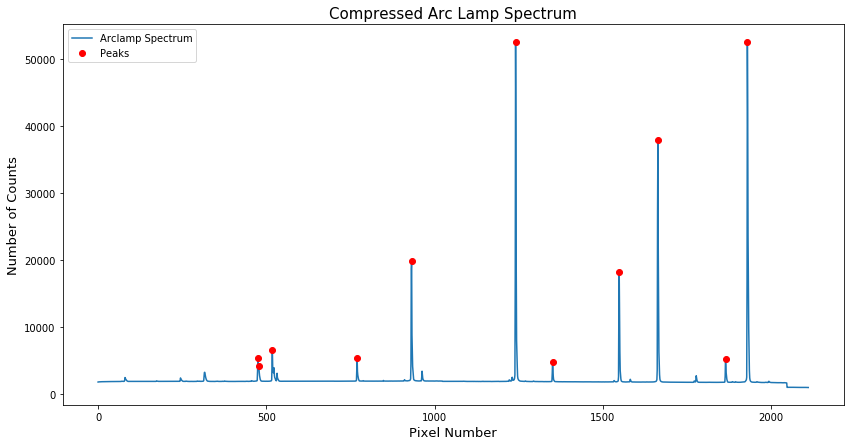

In [6]:
plt.figure(figsize=(14,7))
plt.plot(ArcsArr,label='Arclamp Spectrum')
plt.title('Compressed Arc Lamp Spectrum',{'fontsize':'15'})
plt.xlabel('Pixel Number',{'fontsize':'13'})
plt.ylabel('Number of Counts',{'fontsize':'13'})
n = 0
Maxima = np.zeros(ArcsArr.shape)
Mask = np.ones(ArcsArr.shape)
for i in range(len(ArcsArr)):
    Threshold = 2*np.average(ArcsArr)
    if ArcsArr[i]>Threshold and ArcsArr[i]>ArcsArr[i+1] and ArcsArr[i]>ArcsArr[i-1]:
        print('i={0}, ArcsArr[i]={1}'.format(i,ArcsArr[i]))
        Maxima[i] = ArcsArr[i]
        Mask[i] = 0
mMaxima = ma.array(Maxima,mask=Mask)
plt.plot(mMaxima,'ro',label='Peaks')
plt.legend();

In [7]:
CD = {1930:'5085.82',1241:'4358.33',932:'4046.56',1549:'4678.16',1664:'4799.92'}

In [8]:
n = sorted(CD)
CDO = {}
for i in range(len(CD)):
    CDO[n[i]] = CD[n[i]]

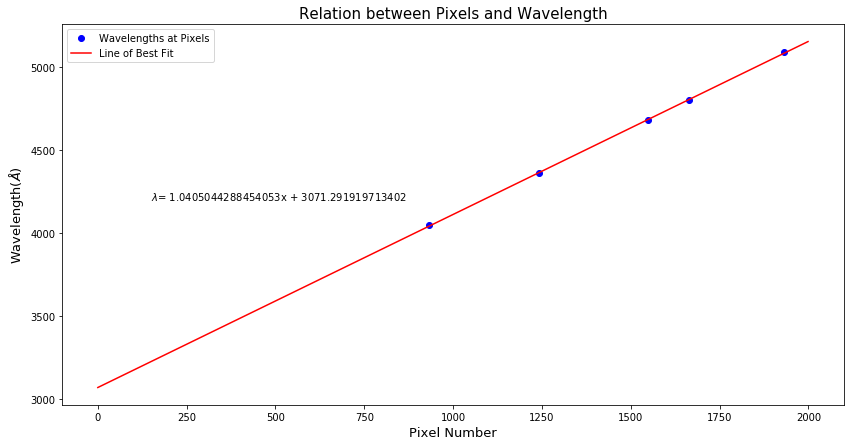

In [9]:
Counts = len(CDO.items())
i = 0
Keys = np.zeros(Counts)
Values = np.zeros(Counts)
for key,value in CDO.items():
    Keys[i] = key
    Values[i] = float(CDO[key])
    i += 1
m, b = np.polyfit(Keys,Values,1)
x = np.arange(0,2000)
plt.figure(figsize=(14,7))
plt.plot(Keys,Values,'bo',label='Wavelengths at Pixels')
plt.plot(m*x + b,'r',label='Line of Best Fit')
plt.text(150,4200,r'$\lambda$''= {0}x + {1}'.format(m,b))
plt.title('Relation between Pixels and Wavelength',{'fontsize':'15'})
plt.xlabel('Pixel Number',{'fontsize':'13'})
plt.ylabel('Wavelength('r'$\AA$'')',{'fontsize':'13'})
plt.legend();

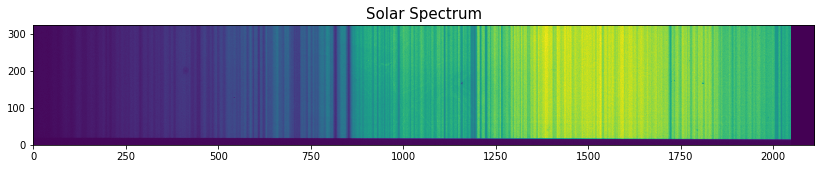

In [10]:
plt.figure(figsize=(14,7))
plt.imshow(SS,origin='lower')
plt.title('Solar Spectrum',{'fontsize':'15'});

In [11]:
SSArr = np.zeros(SS.shape[1])
for i in range(SS.shape[1]):
    SSArr[i] = np.median(SS[:,i])

In [12]:
SSWave = [m*y + b for y in range(len(SSArr))]

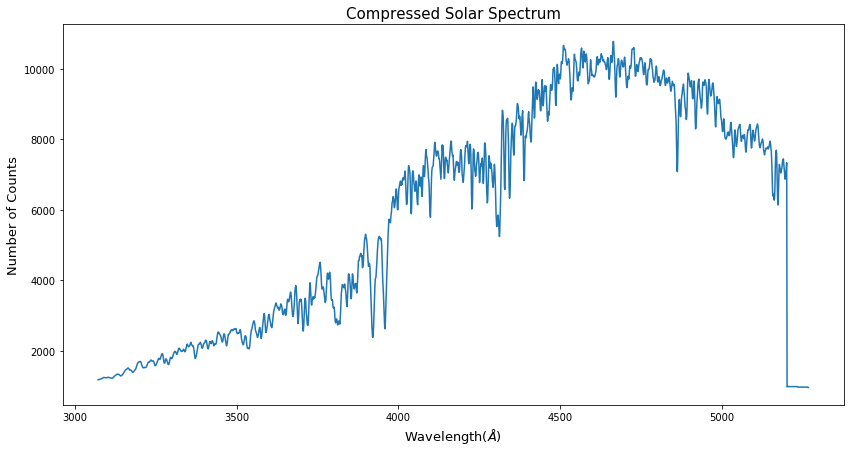

In [13]:
plt.figure(figsize=(14,7))
plt.plot(SSWave,SSArr)
plt.title('Compressed Solar Spectrum',{'fontsize':'15'})
plt.xlabel('Wavelength('r'$\AA$'')',{'fontsize':'13'})
plt.ylabel('Number of Counts',{'fontsize':'13'});

In [14]:
g = GK(stddev=5)

In [15]:
SSsmooth = cv(SSArr,g)

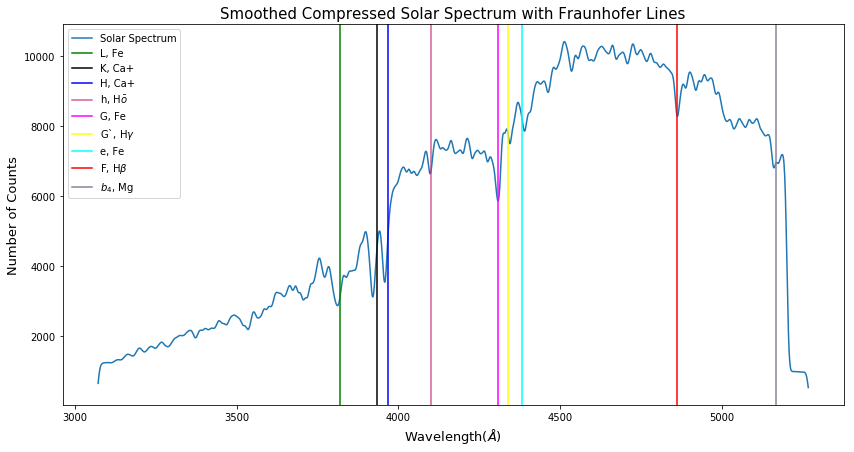

In [16]:
plt.figure(figsize=(14,7))
plt.plot(SSWave,SSsmooth,label='Solar Spectrum')
plt.axvline(x=3820.44,color='green',label='L, Fe')
plt.axvline(x=3933.66,color='black',label='K, Ca+')
plt.axvline(x=3968.47,color='blue',label='H, Ca+')
plt.axvline(x=4101.75,color=(0.8,0.2,0.5,0.8),label='h, H'r'$\bar{o}$')
plt.axvline(x=4307.9,color='magenta',label='G, Fe')
plt.axvline(x=4340.47,color='yellow',label='G`, H'r'$\gamma$')
plt.axvline(x=4383.55,color='cyan',label='e, Fe')
plt.axvline(x=4861.34,color='red',label='F, H'r'$\beta$')
plt.axvline(x=5167.33,color=(0.55,0.5,0.6),label=r'$b_4$'', Mg')
plt.legend(loc=2)
plt.title('Smoothed Compressed Solar Spectrum with Fraunhofer Lines',{'fontsize':'15'})
plt.xlabel('Wavelength('r'$\AA$'')',{'fontsize':'13'})
plt.ylabel('Number of Counts',{'fontsize':'13'});

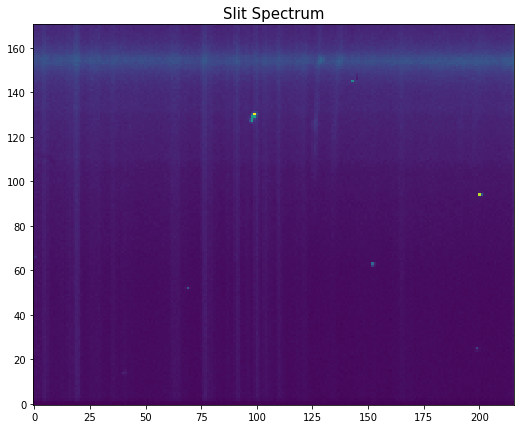

In [17]:
plt.figure(figsize=(14,7))
plt.imshow(ST,origin='lower')
plt.title('Slit Spectrum',{'fontsize':'15'});

In [18]:
Rows = np.zeros(ST.shape[0])
for i in range(ST.shape[0]):
    Rows[i] = np.sum(ST[i])

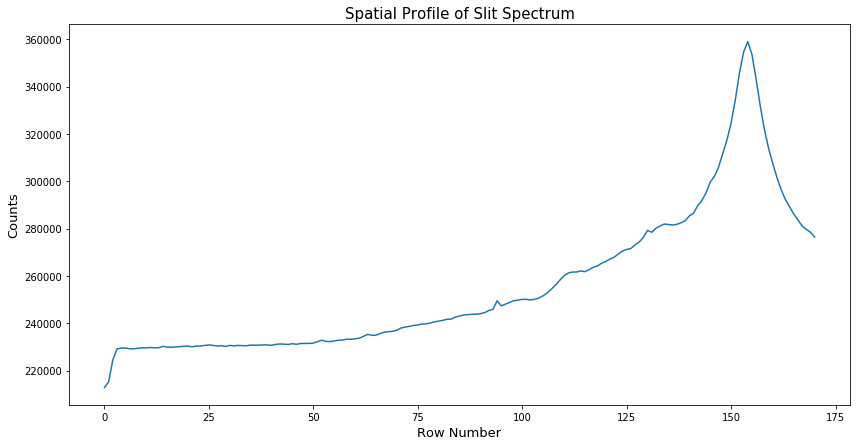

In [19]:
plt.figure(figsize=(14,7))
plt.plot(Rows)
plt.title('Spatial Profile of Slit Spectrum',{'fontsize':'15'})
plt.xlabel('Row Number',{'fontsize':'13'})
plt.ylabel('Counts',{'fontsize':'13'});

In [20]:
Columns = np.zeros(ST.shape[1])
for i in range(ST.shape[1]):
    Columns[i] =  np.sum(ST[:,i])

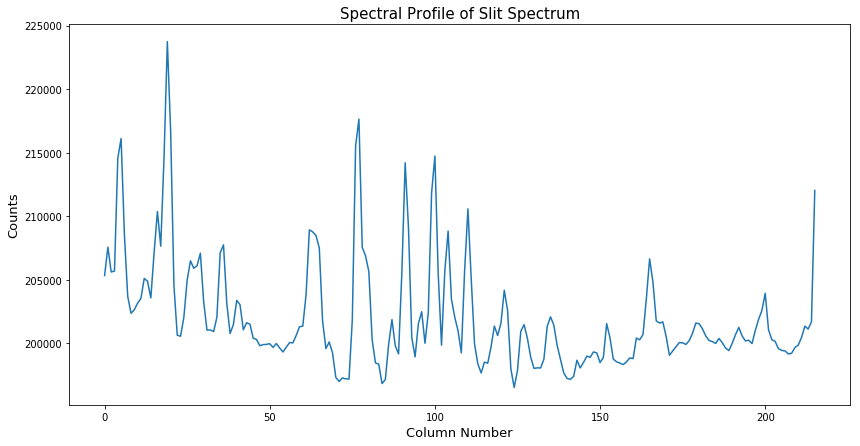

In [21]:
plt.figure(figsize=(14,7))
plt.plot(Columns)
plt.title('Spectral Profile of Slit Spectrum',{'fontsize':'15'})
plt.xlabel('Column Number',{'fontsize':'13'})
plt.ylabel('Counts',{'fontsize':'13'});

## Clean the slit spectrum using astroscrappy.detect_cosmics

In [22]:
_,STclean = astroscrappy.detect_cosmics(ST,inmask=None,cleantype='median')

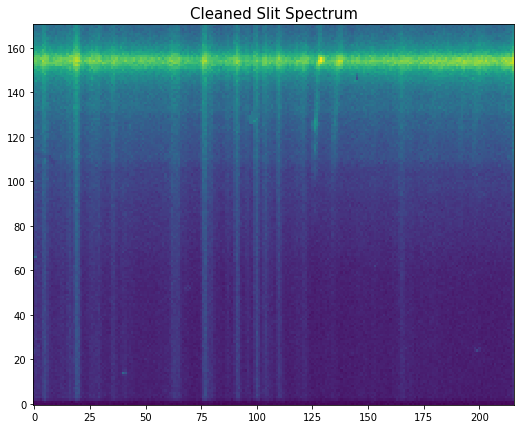

In [23]:
plt.figure(figsize=(14,7))
plt.imshow(STclean,origin='lower')
plt.title('Cleaned Slit Spectrum',{'fontsize':'15'});

In [24]:
xrows = np.arange(STclean.shape[0])
bkg = np.zeros_like(STclean)
row_range = 135
x = np.arange(0,row_range)
for col in np.arange(STclean.shape[1]):
    pfit = np.polyfit(x, STclean[x, col], 2)
    bkg[:, col] = np.polyval(pfit,xrows)

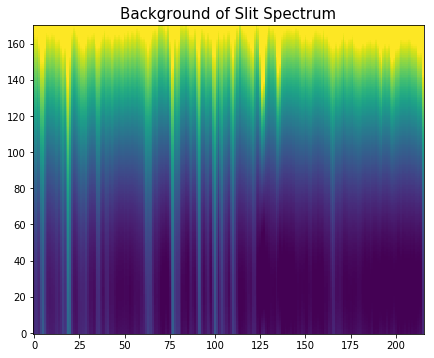

In [25]:
plt.figure(figsize=(7,7))
plt.imshow(bkg, origin='lower', vmin=np.percentile(bkg,5), vmax=np.percentile(bkg,95))
plt.title('Background of Slit Spectrum',{'fontsize':'15'});

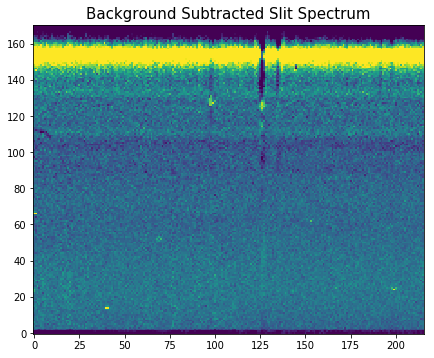

In [26]:
a = STclean - bkg
plt.figure(figsize=(7,7))
plt.imshow(a, vmin= np.percentile(a, 5), vmax =np.percentile(a, 95), origin='lower')
plt.title('Background Subtracted Slit Spectrum',{'fontsize':'15'});

### Tests

In [27]:
ycols = np.arange(STclean.shape[1])
Approx = np.zeros_like(STclean)
y = np.arange(0,STclean.shape[1])
for row in np.arange(row_range):
    pfit = np.polyfit(y, STclean[row, y], 6)
    Approx[row] = np.polyval(pfit,ycols)

In [28]:
bkgint = STclean[0:row_range] - Approx[0:row_range]

In [29]:
xrows2 = np.arange(STclean.shape[0])
bkg2 = np.zeros_like(STclean)
x2 = np.arange(0,row_range)
for col in np.arange(STclean.shape[1]):
    pfit2 = np.polyfit(x, bkgint[x2, col], 2)
    bkg2[:, col] = np.polyval(pfit2,xrows2)

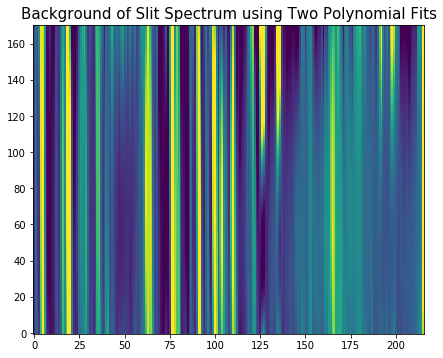

In [30]:
plt.figure(figsize=(7,7))
plt.imshow(bkg2, vmin= np.percentile(bkg2, 5), vmax =np.percentile(bkg2, 95), origin='lower')
plt.title('Background of Slit Spectrum using Two Polynomial Fits',{'fontsize':'15'});

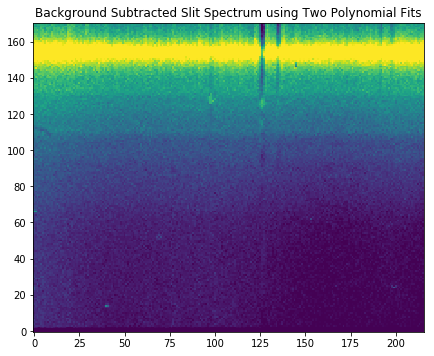

In [31]:
b = STclean - bkg2
plt.figure(figsize=(7,7))
plt.imshow(b, vmin= np.percentile(b, 5), vmax =np.percentile(b, 95), origin='lower')
plt.title('Background Subtracted Slit Spectrum using Two Polynomial Fits');